<a href="https://colab.research.google.com/github/riezaferdi/tugascnn/blob/main/CNN_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Imports

In [ ]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
import cv2
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Load Data

In [ ]:
root = "/content/drive/MyDrive/Tugas ML/MLP/"

In [ ]:
def load_data(folder):
  """
  fungsi untuk load semua image jpg dalam folder, lalu mengubahnya menjadi np
  array
  
  folder : path ke folder

  mengembalikan arr, array berisi semua image dalam folder
  """
  arr = []
  for filepath in tqdm(sorted(glob.glob(os.path.join(folder, "*.jpg")))):
    im = Image.open(filepath).resize((320, 240))
    im = np.asarray(im)
    arr.append(im)
  return arr

In [ ]:
dandelion = load_data(root + "dataset/dandelion/")
rose = load_data(root + "dataset/rose/")
sunflower = load_data(root + "dataset/sunflower/")

100%|██████████| 100/100 [00:00<00:00, 145.87it/s]


# Visualisasi

In [ ]:
def visualise(arr, num_img=10, columns=5, width=20, height=5):
  """
  fungsi untuk menampilkan beberapa gambar contoh dari array
  berisi kumpulan gambar

  arr : array yang menyimpan semua gambar
  num_img : jumlah gambar yang akan ditampilkan
  columns : banyak gambar per baris
  width : lebar dari figure plot
  height : tinggi dari figure plot
  """
  height = max(height, int(num_img/columns) * height)
  plt.figure(figsize=(width, height))
  for i, img in enumerate(arr[:num_img]):
    plt.subplot(int(num_img / columns + 1), columns, i + 1)
    plt.imshow(img)
  plt.show()

DANDELION


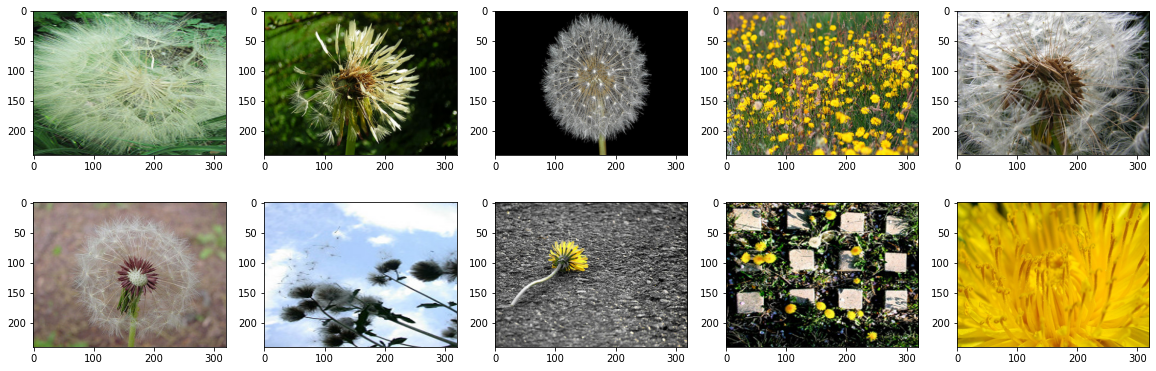

In [ ]:
print("DANDELION")
visualise(dandelion)

ROSE


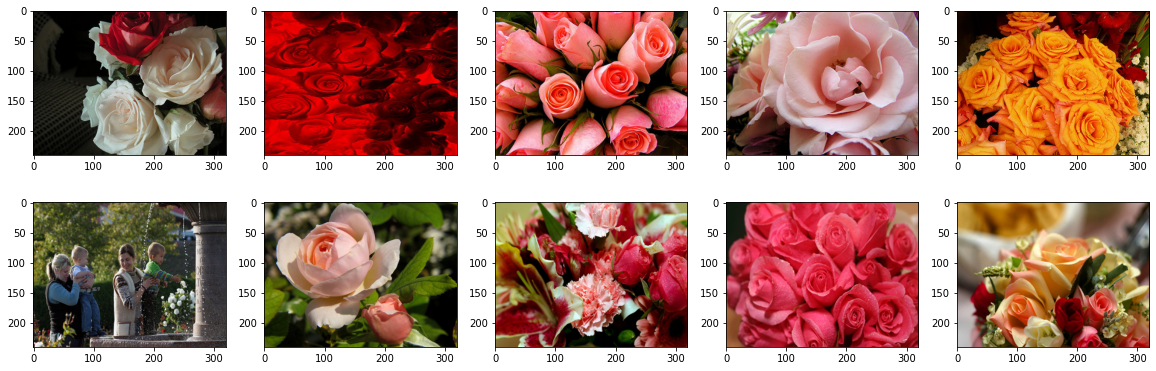

In [ ]:
print("ROSE")
visualise(rose)

SUNFLOWER


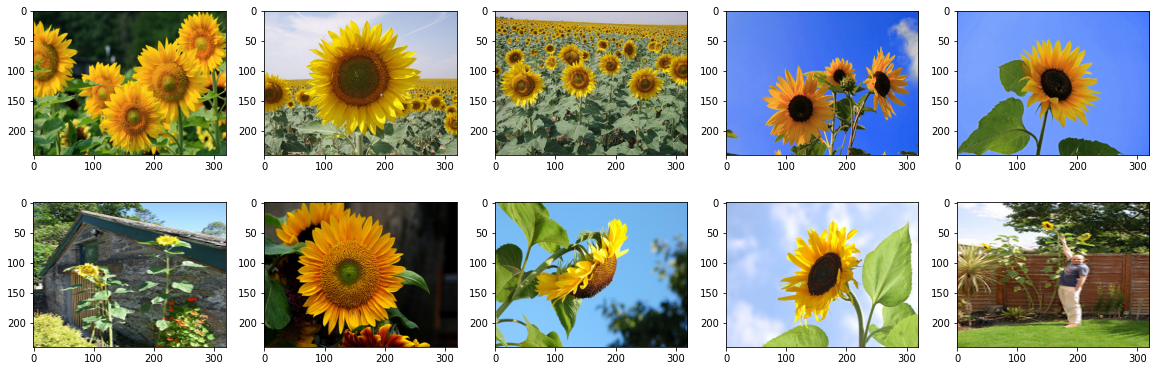

In [ ]:
print("SUNFLOWER")
visualise(sunflower)

# Train Test Split

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []

data = [dandelion, rose, sunflower]
labels = ["dandelion", "rose", "sunflower"]

train_ratio = 0.8
n_train = int(train_ratio*len(dandelion))

for i, d in enumerate(data):
  X_train.extend(d[:n_train])
  y_train.extend([labels[i] for _ in range(n_train)])
  X_test.extend(d[n_train:])
  y_test.extend([labels[i] for _ in range(len(d)-n_train)])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Model CNN

In [ ]:
#one hot encode target
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation="relu", input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 238, 318, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 238, 318, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 117, 157, 32)      9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 117, 157, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 58, 78, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 144768)           

In [ ]:
callback = EarlyStopping(monitor='loss', patience=3)
opt = Adam()
model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=["accuracy"],)

In [ ]:
epochs = 20
history = model.fit(
            X_train, y_train, 
            validation_data=(X_test, y_test),
            epochs=epochs,
            callbacks=[callback])

Epoch 1/20
8/8 [==============================] - 27s 3s/step - loss: 11.3518 - accuracy: 0.5813 - val_loss: 60.4759 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 26s 3s/step - loss: 5.3580 - accuracy: 0.7856 - val_loss: 37.5412 - val_accuracy: 0.4167
Epoch 3/20
8/8 [==============================] - 26s 3s/step - loss: 2.5286 - accuracy: 0.8365 - val_loss: 54.4395 - val_accuracy: 0.4167
Epoch 4/20
8/8 [==============================] - 26s 3s/step - loss: 0.9262 - accuracy: 0.8955 - val_loss: 24.8600 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 26s 3s/step - loss: 0.3808 - accuracy: 0.9771 - val_loss: 28.6333 - val_accuracy: 0.4333
Epoch 6/20
8/8 [==============================] - 26s 3s/step - loss: 0.1289 - accuracy: 0.9832 - val_loss: 17.6932 - val_accuracy: 0.4333
Epoch 7/20
8/8 [==============================] - 26s 3s/step - loss: 0.0458 - accuracy: 0.9865 - val_loss: 19.3354 - val_accuracy: 0.5833
Epoch 8/20
8/8 [==========

# Evaluasi Hasil

In [ ]:
y_preds = model.predict(X_test)
y_preds = y_preds.argmax(axis=-1)
print(classification_report(y_test.argmax(axis=-1), y_preds))

              precision    recall  f1-score   support

           0       0.60      0.15      0.24        20
           1       0.71      0.85      0.77        20
           2       0.58      0.90      0.71        20

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.57        60
weighted avg       0.63      0.63      0.57        60



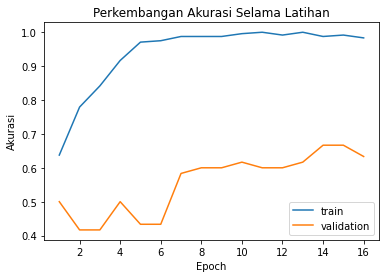

In [ ]:
x = [i for i in range(1, len(history.history["accuracy"])+1)]
plt.plot(x, history.history["accuracy"])
plt.plot(x, history.history["val_accuracy"])
plt.title("Perkembangan Akurasi Selama Latihan")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend(['train', 'validation'])
plt.show()

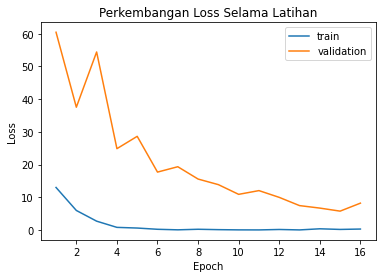

In [ ]:
plt.plot(x, history.history["loss"])
plt.plot(x, history.history["val_loss"])
plt.title("Perkembangan Loss Selama Latihan")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train', 'validation'])
plt.show()